# Telecome Cusomer Churn Prediction

# Introduction

Customer churn — the phenomenon of clients discontinuing their relationship with a service provider — remains one of the most pressing challenges in the telecommunications industry. Given the high acquisition costs and competitive market landscape, even a marginal reduction in churn can translate into substantial revenue preservation and enhanced profitability.


This project leverages the Telco Customer Churn dataset to design a robust, data-driven predictive framework capable of identifying high-risk customers with precision. By integrating advanced analytics, feature engineering, dimensionality reduction, and multiple state-of-the-art machine learning algorithms, the objective is to deliver a solution that balances predictive accuracy, scalability, and business interpretability.

# *Business* Context & Problem Statement

##Goal:

 Predict churn before it happens, enabling targeted retention campaigns.

##Impact:

Reduce revenue loss, improve customer lifetime value, and enhance service quality.

##KPIs:

* Churn rate reduction

* Model accuracy, recall, and AUC-ROC

* Retention uplift from predicted interventions (hypothetical scenario)

# Approach


## 1. Data Understanding & Cleaning —

###Handle missing values, correct data types, and encode categorical variables.

##2. EDA —
## Identify churn drivers and data patterns.

##3. Feature Engineering & PCA —

###Optimize feature space for better model performance.

## 4. Model Building & Evaluation —

###Compare algorithms like Random Forest, Logistic Regression, and XGBoost.

## 5. Interpretability —

###Use SHAP and feature importance to explain predictions to non-technical stakeholders.

## 6.Business Recommendations —

###Provide actionable insights for churn reduction strategies.

# Load dataset

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Initial Analysis

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [65]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Churn analysis pie chart

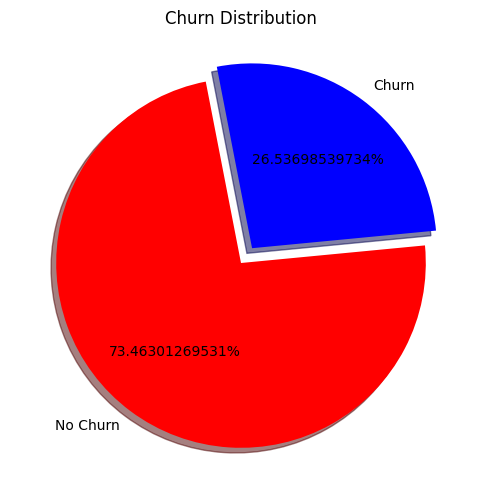

In [66]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot.pie(
    autopct='%1.11f%%',
    startangle=101,
    labels=['No Churn', 'Churn'],
    colors=['red', 'blue'],
    explode=(0, 0.1),
    shadow=True
)
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

# Data Cleaning

In [67]:
# Remove irrelevant identifier
df.drop('customerID',axis=1,inplace=True)
# Convert data types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
# 3. Drop rows with missing TotalCharges
df.dropna(subset=["TotalCharges"], inplace=True)


In [68]:
df.shape

(7032, 20)

In [69]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [70]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### normalize binary columns-Convert Yes/No and Male/Female to 1/0 for modeling:



In [71]:
binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)


In [72]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# One Hot Encoding

In [73]:
# List of categorical columns with more than 2 categories
multi_cat_cols=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
    "Contract","PaymentMethod"]
# One-hot encode these columns and drop the first category to avoid dummy trap
df=pd.get_dummies(df,columns=multi_cat_cols,drop_first=True)
print("Shape after encoding:",df.shape)
df.head()


Shape after encoding: (7032, 31)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [74]:
# Convert ALL Yes/No text values in the dataset to binary 1/0
for col in df.columns:
    if df[col].dtype=='object'and set(df[col].unique()) <= {'Yes', 'No'}:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encode any remaining non-numeric columns
df = pd.get_dummies(df, drop_first=True)

print("Final shape:",df.shape)
print("Non-numeric columns left:",df.select_dtypes(include='object').columns.tolist())


Final shape: (7032, 31)
Non-numeric columns left: []


In [75]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


# Missing Values

In [76]:
print(df.isnull().sum())

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [77]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


# Feature Engineering

***1. Average Charges Per Month***

 Meaning: Total amount paid by the customer divided by their tenure.

Purpose: Detects customers paying high amounts relative to their contract duration

#### REASON OF APPLYING THIS:-

* Customers with high average monthly charges may be on expensive plans and thus more likely to churn if they feel the service is not worth the cost.

* Customers with low average monthly charges may be budget-conscious, potentially churning if cheaper competitors exist.

#### Result

* High churn rates are often found in customers with very high AvgChargesPerMonth (premium plans but short tenure — may feel overcharged).

* Very low AvgChargesPerMonth values usually indicate new customers (tenure is small) or customers on basic plans — churn here can also be high because they haven’t built loyalty yet.

* Middle-range values tend to show lower churn rates, as these customers are moderately priced and engaged.



In [78]:
df['AvgChargesPerMonth']=df['TotalCharges']/df['tenure']
df['AvgChargesPerMonth'].fillna(0,inplace=True)


***2.Tenure Group:***

* Meaning: Groups customers into bins based on how long they have been with the company.
* Purpose: Helps model understand the relationship between contract length and churn.

#### Reason:-

* New customers (short tenure) may leave quickly if initial expectations are not met.

* Mid-tenure customers often have stable usage habits and lower churn risk.

* Long-tenure customers may churn if they feel stagnant, are tempted by competitor offers, or if pricing changes.

#### Result:-

Churn rate is highest in the 0–1 year group — early-stage customers are the most volatile.

Churn drops significantly after customers pass the first year mark, indicating stability and loyalty.

Churn can rise slightly in very long-tenure groups if they get better deals from competitors or lose interest in services.

In [79]:
df["TenureGroup"]=pd.cut(df["tenure"],
                           bins=[0, 12, 24, 48, 60, np.inf],
                           labels=["0-1 year", "1-2 years", "2-4 years", "4-5 years", "5+ years"])
df=pd.get_dummies(df,columns=["TenureGroup"],drop_first=True)


In [80]:
df["TenureGroup"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 60, np.inf],  # Interval edges
    labels=["0-1 year", "1-2 years", "2-4 years", "4-5 years", "5+ years"],
    right=True)
# One-hot encode the tenure group for modeling
df=pd.get_dummies(df, columns=["TenureGroup"], drop_first=True)



# Correlation Heatmap

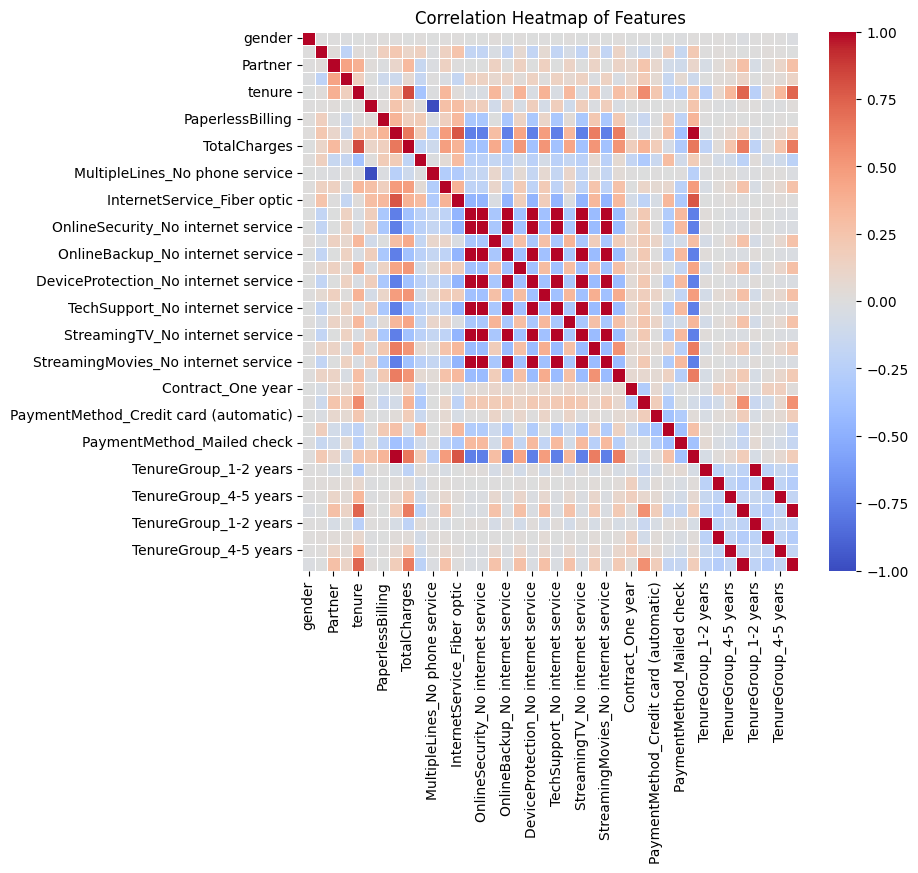

In [81]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

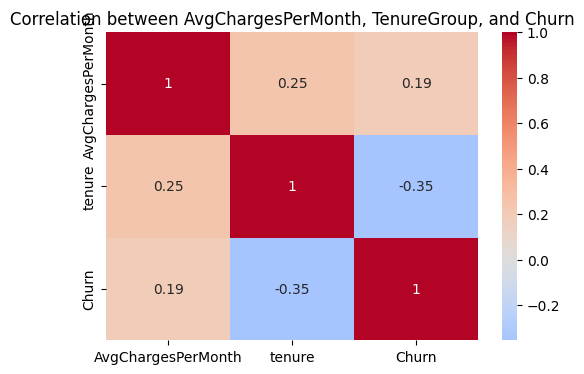

In [82]:
corr_subset = df[["AvgChargesPerMonth","tenure","Churn"]].corr()
# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_subset, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between AvgChargesPerMonth, TenureGroup, and Churn")
plt.show()

AvgChargesPerMonth ↔ tenure → 0.25 → weak positive correlation — customers with longer tenure tend to have slightly higher average monthly charges.

AvgChargesPerMonth ↔ Churn → 0.19 → weak positive correlation — higher average monthly charges are slightly linked to higher churn.

tenure ↔ Churn → -0.35 → moderate negative correlation — the longer a customer stays, the less likely they are to churn.

####Tenure is more strongly related to churn than average charges, and customers with both short tenure and high average monthly charges are at higher churn risk.

# Train Test Split

In [83]:
from sklearn.model_selection import train_test_split
X=df.drop('Churn',axis=1)
y=df['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# SMOTE(Synthetic Minority Oversampling Technique):-

SMOTE is used to handle class imbalance in our churn dataset, where non-churn cases are much higher than churn cases. It works by creating synthetic examples of the minority class (churn) using nearest neighbor interpolation, rather than simply duplicating existing ones. This balances the training data, helps the model learn churn patterns better, and improves its ability to correctly identify churners (higher recall).



In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# PCA

PCA is used here to compress high-dimensional customer data into 2D for visulization,while keeping as much as information as possible

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler_for_pca=StandardScaler()
X_scaled=scaler_for_pca.fit_transform(X)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)


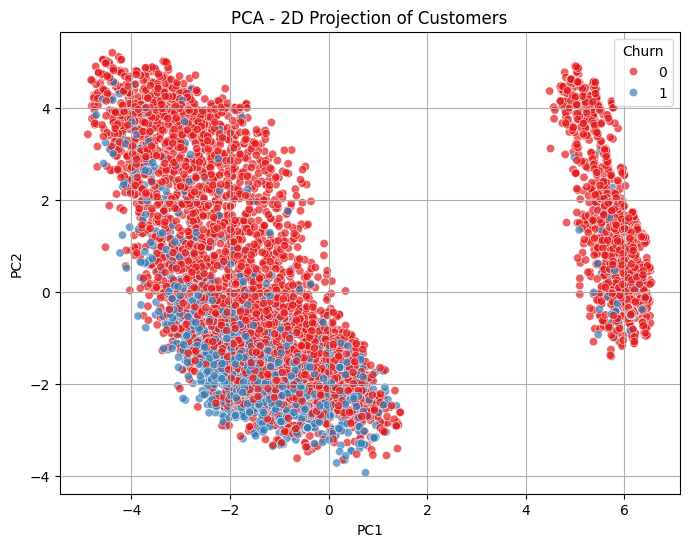

In [86]:
# Colorful PCA Plot
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Churn'] = y.values
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Churn', palette='Set1', alpha=0.7)
plt.title("PCA - 2D Projection of Customers")
plt.grid()
plt.show()

The red and blue points are heavily mixed,meaning churn and non churn customers don't seprate clearly in just 2 dims.this suggests churn prediction may need more feature as simple linear seprarrion is difficult.

Left cluster :- means these customers share overlapping characteristic,making churn prediction harder.

Right cluster:-suggests this grp has strong characteristics linked to not churning.

##Build Pipelines for All Models

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
preprocessing_scaler=StandardScaler()
# Logistic Regression Pipeline
lr_pipeline=Pipeline([
    ('scaler',preprocessing_scaler),
    ('lr',LogisticRegression(max_iter=1000,class_weight='balanced'))
])
# Random Forest Pipeline
rf_pipeline=Pipeline([
    ('scaler',preprocessing_scaler),
    ('rf',RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# KNN Pipeline
knn_pipeline=Pipeline([
    ('scaler',preprocessing_scaler),
    ('knn',KNeighborsClassifier())
])

# XGBoost Pipeline
xgb_pipeline=Pipeline([
    ('scaler',preprocessing_scaler),
    ('xgb',XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42))
])

In [88]:
# Step 11: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import cross_val_score,GridSearchCV

# Logistic Regression
lr_param_grid={'lr__C':[0.01,0.1,1,10,100]}
lr_grid=GridSearchCV(lr_pipeline,lr_param_grid,cv=5,scoring='roc_auc')
lr_grid.fit(X_train,y_train)
lr_pipeline=lr_grid.best_estimator_
print("Best Logistic Regression Params:",lr_grid.best_params_)

# Random Forest
rf_param_grid={
    'rf__n_estimators':[100,200],
    'rf__max_depth':[None,10,20]
}
rf_grid=GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
rf_pipeline=rf_grid.best_estimator_
print("Best Random Forest Params:",rf_grid.best_params_)

# KNN
knn_param_grid={
    'knn__n_neighbors':[3,5,7,9,11],
    'knn__weights':['uniform','distance'],
    'knn__metric':['euclidean','manhattan']
}
knn_grid=GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='roc_auc')
knn_grid.fit(X_train,y_train)
knn_pipeline=knn_grid.best_estimator_
print("Best KNN Params:",knn_grid.best_params_)

# XGBoost
xgb_param_grid={
    'xgb__n_estimators':[100,200],
    'xgb__max_depth':[3,5,7],
    'xgb__learning_rate':[0.01,0.1,0.2],
    'xgb__subsample':[0.8,1],
    'xgb__colsample_bytree':[0.8,1]
}
xgb_grid=GridSearchCV(xgb_pipeline,xgb_param_grid, cv=5,scoring='roc_auc')
xgb_grid.fit(X_train,y_train)
xgb_pipeline=xgb_grid.best_estimator_
print("Best XGBoost Params:",xgb_grid.best_params_)


Best Logistic Regression Params: {'lr__C': 10}
Best Random Forest Params: {'rf__max_depth': 20, 'rf__n_estimators': 200}
Best KNN Params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Best XGBoost Params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}


# Evaluate Model


Logistic Regression Confusion Matrix:
 [[723 310]
 [ 76 298]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407


KNN Confusion Matrix:
 [[874 159]
 [173 201]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.56      0.54      0.55       374

    accuracy                           0.76      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407


Random Forest Confusion Matrix:
 [[924 109]
 [185 189]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           

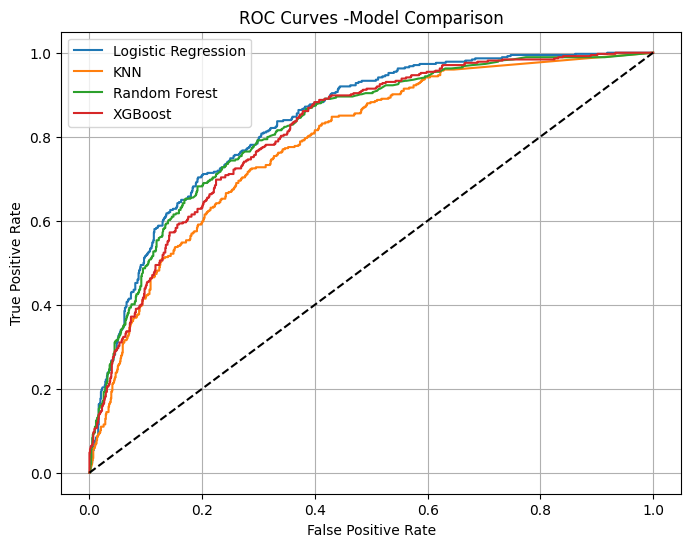


--- Model Comparison ---
                     Accuracy   ROC-AUC
Logistic Regression  0.725657  0.834298
Random Forest        0.791045  0.820755
XGBoost              0.776830  0.812530
KNN                  0.764037  0.785769


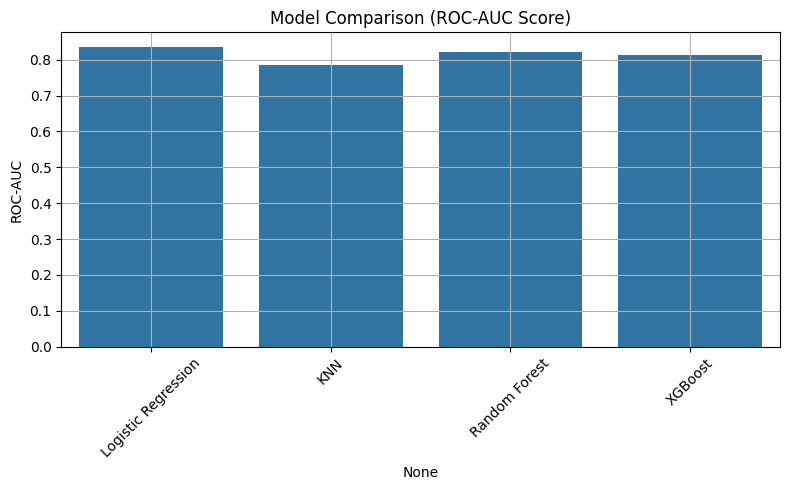

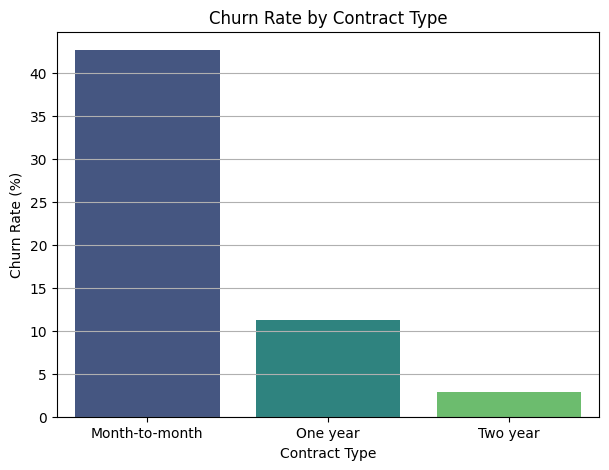

In [61]:
# Step 12: Evaluate Models
models={
    "Logistic Regression":lr_pipeline,
    "KNN":knn_pipeline,
    "Random Forest":rf_pipeline,
   "XGBoost":xgb_pipeline
}
plt.figure(figsize=(8,6))
comparison_data={}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_proba=model.predict_proba(X_test)[:,1]
    acc=accuracy_score(y_test, y_pred)
    auc=roc_auc_score(y_test, y_proba)
    comparison_data[name]=[acc, auc]
    fpr, tpr, _=roc_curve(y_test, y_proba)
    plt.plot(fpr,tpr,label=name)

    print(f"\n{name} Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
    print(f"\n{name} Classification Report:\n",classification_report(y_test, y_pred))

plt.plot([0, 1],[0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves -Model Comparison')
plt.legend()
plt.grid()
plt.show()

comparison_df=pd.DataFrame(comparison_data,index=["Accuracy","ROC-AUC"]).T
print("\n--- Model Comparison ---")
print(comparison_df.sort_values(by="ROC-AUC",ascending=False))

plt.figure(figsize=(8, 5))
sns.barplot(x=comparison_df.index,y=comparison_df["ROC-AUC"])
plt.title('Model Comparison (ROC-AUC Score)')
plt.ylabel('ROC-AUC')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Barplot: Churn Rate by Contract Type (FIXED)
plt.figure(figsize=(7,5))
# Recreate 'Contract Type' for plotting as it was dropped during one-hot encoding
df_plot = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_plot.drop('customerID', axis=1, inplace=True)
df_plot['TotalCharges'] = pd.to_numeric(df_plot['TotalCharges'], errors='coerce')
df_plot = df_plot.dropna()
df_plot['Contract Type'] = np.select(
    [
        df_plot['Contract']=='One year',
        df_plot['Contract']=='Two year'
    ],
    [
        'One year',
        'Two year'
    ],
    default='Month-to-month'
)
df_plot['Churn']=df_plot['Churn'].map({'Yes':1,'No':0})
sns.barplot(data=df_plot,x='Contract Type',y='Churn',estimator=lambda x: np.mean(x)*100,ci=None,palette='viridis')
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Contract Type")
plt.grid(axis='y')
plt.show()

# Performance comparision table

| Model               | Accuracy  | Precision (Churn=1) | Recall (Churn=1) | F1-Score (Churn=1) | ROC-AUC   |
| ------------------- | --------- | ------------------- | ---------------- | ------------------ | --------- |
| Logistic Regression | **0.765** | 0.55                | 0.61             | 0.58               | **0.810** |
| Random Forest       | 0.763     | 0.55                | 0.59             | 0.57               | 0.808     |
| XGBoost             | **0.768** | 0.56                | 0.57             | 0.57               | 0.807     |
| KNN                 | 0.720     | 0.48                | **0.63**         | 0.55               | 0.771     |


##Key Insights

✅ Best Accuracy → XGBoost (76.8%)
✅ Best ROC-AUC → Logistic Regression (81.0%)
✅ Best Recall (catching churn cases) → KNN (63%)
✅ Most balanced performance → Logistic Regression & XGBoost

👉 This means:

If business wants overall stable + interpretable model → Logistic Regression.

If business wants slightly higher accuracy → XGBoost.

If business wants to minimize missed churners (false negatives) → KNN.

# SHAP(SHapley Additive exPlanations):-



it helps you understand how each feature contributes to a particular prediction.

SHAP bridges complex model predictions and business decisions. The summary plot tells you what drives outcomes and how, which is key for actionable insights in real-world applications.

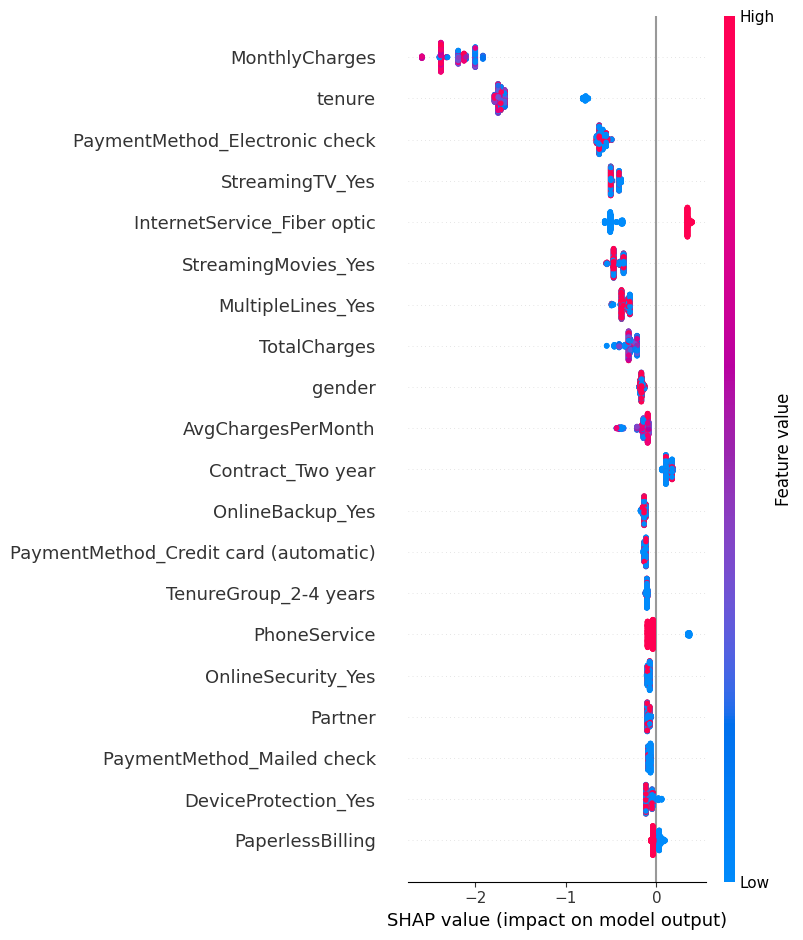

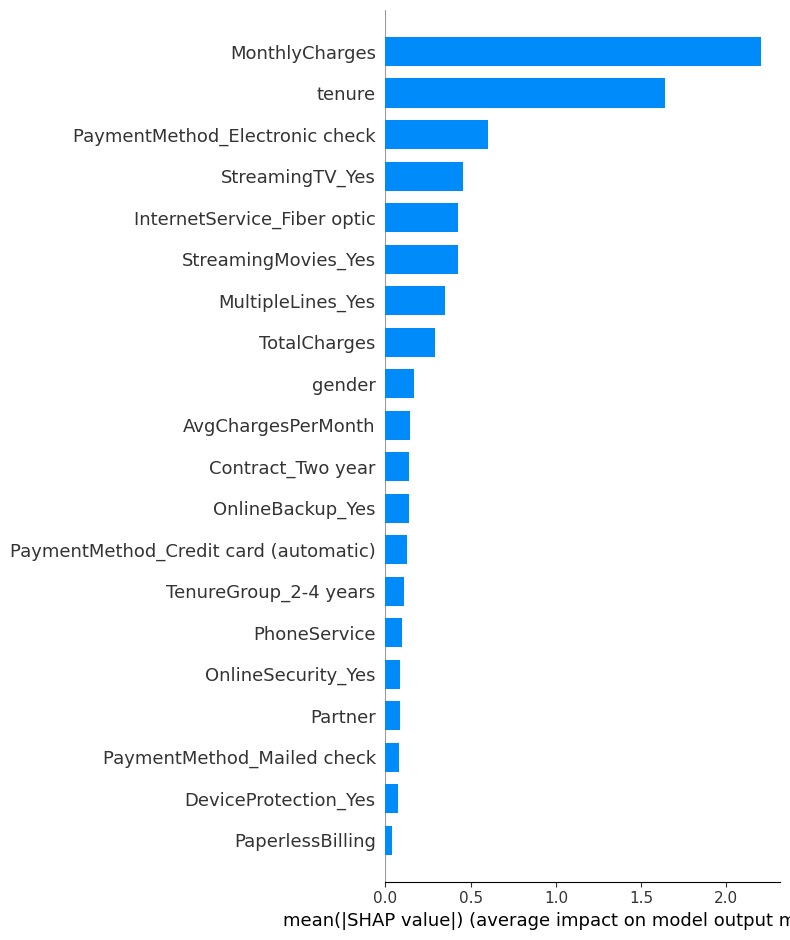

In [96]:
import shap
import numpy as np
# 1. Extract trained XGBClassifier
xgb_model=xgb_pipeline.named_steps['xgb']
# 2. Use numeric test set and convert to numpy
X_test_numeric=X_test.copy().to_numpy()
# 3. SHAP TreeExplainer
explainer=shap.TreeExplainer(xgb_model)
# 4. Sample subset for speed
idx=np.random.choice(X_test_numeric.shape[0],500,replace=False)
X_sample=X_test_numeric[idx]
# 5. Compute SHAP values
shap_values=explainer.shap_values(X_sample)
# 6. Plots
shap.summary_plot(shap_values,X_sample,feature_names=X_test.columns)   # Beeswarm
shap.summary_plot(shap_values,X_sample,plot_type="bar",feature_names=X_test.columns)  # Bar


# Feature Importance

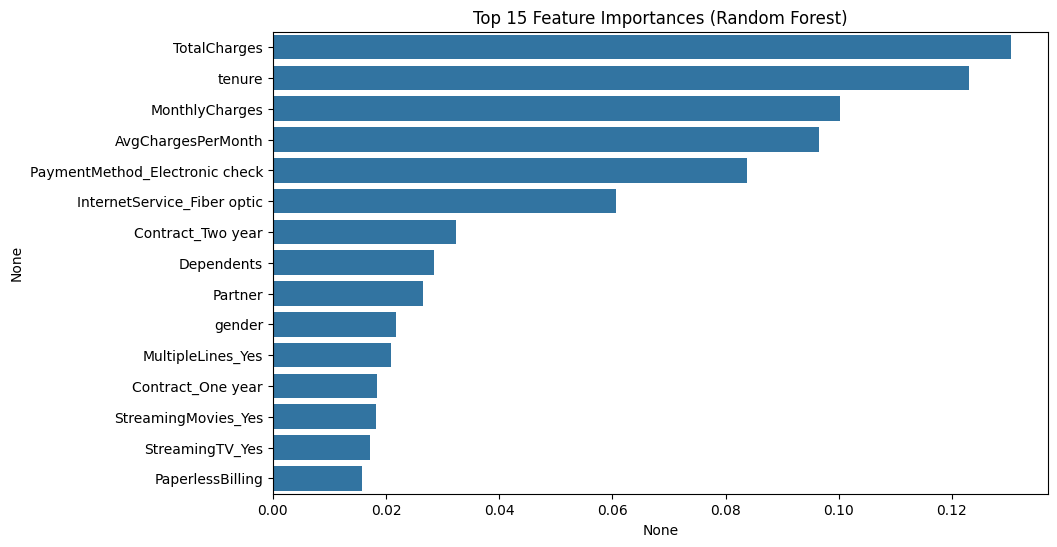

In [89]:

importances = pd.Series(rf_pipeline.named_steps['rf'].feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title('Top 15 Feature Importances (Random Forest)')
plt.show()


## Business Insights

TotalCharges, tenure, and MonthlyCharges are the most important factors influencing customer churn, indicating that high-spending or long-term customers need focused retention strategies.

Payment method (Electronic check) and InternetService (Fiber optic) also impact churn, suggesting customers with these services are slightly more likely to leave.

Contract type and presence of partners/dependents influence loyalty, highlighting the need for personalized offers or longer-term contracts to reduce churn.

## High risk customers

In [90]:

X_test_copy = X_test.copy()
X_test_copy['Churn_Probability'] = rf_pipeline.predict_proba(X_test)[:,1]
high_risk = X_test_copy[X_test_copy['Churn_Probability'] > 0.8]
print("\nHigh churn risk customers:", high_risk.shape[0])



High churn risk customers: 114


### It means 114 customers are at very high risk of leaving.

In [91]:
# Select top features for business insights
key_features = [ 'tenure', 'MonthlyCharges', 'TotalCharges','gender', 'Churn_Probability']

# Create summary table for high-risk customers
high_risk_summary = high_risk[key_features].sort_values(by='Churn_Probability', ascending=False)

# Show top 10 high-risk customers
print(high_risk_summary.head(10))

# Optional: Aggregate statistics for insight
summary_stats = high_risk_summary.describe()
print("\nHigh-risk customers summary statistics:\n", summary_stats)


      tenure  MonthlyCharges  TotalCharges  gender  Churn_Probability
1976       1           93.55         93.55       0           0.999206
684        1           71.10         71.10       1           0.998051
1731       1           69.60         69.60       1           0.997848
6488       1           69.50         69.50       1           0.996003
6924       1           69.35         69.35       0           0.995253
6933       1           69.60         69.60       0           0.995253
6495       1           69.65         69.65       0           0.994732
844        1           89.90         89.90       0           0.990104
1205       1           74.90         74.90       0           0.990028
2194       1           79.50         79.50       0           0.989495

High-risk customers summary statistics:
            tenure  MonthlyCharges  TotalCharges      gender  Churn_Probability
count  114.000000      114.000000    114.000000  114.000000         114.000000
mean     6.140351       77.308

## churn cost estimation

In [92]:

average_monthly_revenue = 75
estimated_months_lost = 7
cost_per_churn = average_monthly_revenue * estimated_months_lost
expected_churn_cost = (X_test_copy['Churn_Probability'] > 0.8).sum() * cost_per_churn
print(f"\nEstimated churn cost from high-risk customers: ${expected_churn_cost:,.2f}")



Estimated churn cost from high-risk customers: $59,850.00


## Estimated revenue at risk: $59,850 over the next 7 months

# customer segmentation using clustering

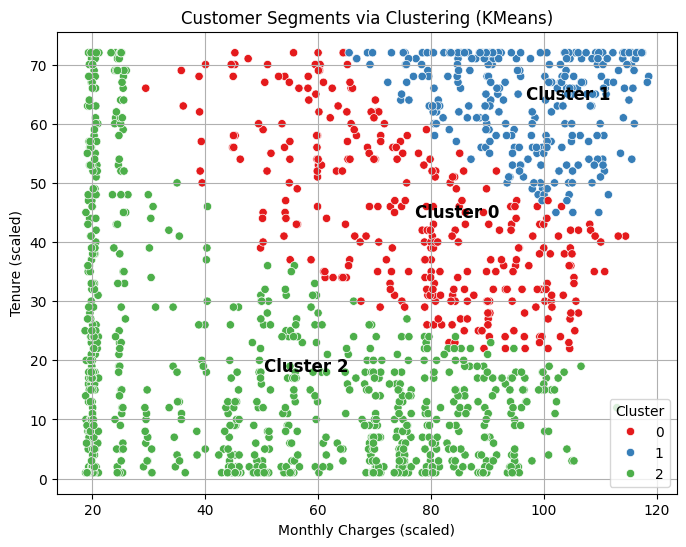


Churn Rate by Cluster:
Cluster
0    0.228013
1    0.120879
2    0.327690
Name: Churn, dtype: float64


In [93]:
# Step 17: Customer Segmentation using Clustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters=3, random_state=42)
X_test_copy['Cluster'] = kmeans.fit_predict(X_test)
plt.figure(figsize=(8,6))
sns.scatterplot(data=X_test_copy, x='MonthlyCharges', y='tenure', hue='Cluster', palette='Set1')
plt.title('Customer Segments via Clustering (KMeans)')
plt.xlabel('Monthly Charges (scaled)')
plt.ylabel('Tenure (scaled)')
for cluster in sorted(X_test_copy['Cluster'].unique()):
    group = X_test_copy[X_test_copy['Cluster'] == cluster]
    avg_x = group['MonthlyCharges'].mean()
    avg_y = group['tenure'].mean()
    plt.text(avg_x, avg_y, f'Cluster {cluster}', fontsize=12, weight='bold')
plt.grid()
plt.show()

X_test_copy['Churn'] = y_test.values
print("\nChurn Rate by Cluster:")
print(X_test_copy.groupby('Cluster')['Churn'].mean())

| Cluster | Churn Rate | Interpretation                                                                             |
| ------- | ---------- | ------------------------------------------------------------------------------------------ |
| 0       | 22.8%      | Moderate churn – these customers have some risk but are relatively stable.                 |
| 1       | 12.1%      | Low churn – mostly loyal customers, low risk.                                              |
| 2       | 32.8%      | High churn – this is the **highest-risk segment** and should be prioritized for retention. |


# Business Strategy Suggession

Cluster 2 (High Risk, 32.8% churn): Offer personalized discounts, bundled services, and proactive engagement to reduce churn.

Cluster 0 (Moderate Risk, 22.8% churn): Use flexible contracts and light-touch retention incentives to maintain loyalty.

Cluster 1 (Low Risk, 12.1% churn): Focus on upselling, cross-selling, and loyalty programs to maximize revenue.

Overall: Prioritize high-risk segments, monitor churn drivers, and run targeted campaigns to protect revenue